In [1]:
import os
path_xray = os.getcwd() + "\\dataset"

path_train = path_xray + "\\training"
path_train_fractured = path_train + "\\fractured"
path_train_not_fractured = path_train + "\\not_fractured"

path_test = path_xray + "\\testing"
path_test_fractured = path_test + "\\fractured"
path_test_not_fractured = path_test + "\\not_fractured"

image_location_paths = [path_train_fractured, path_train_not_fractured,
                        path_test_fractured, path_test_not_fractured]
image_train_location_paths = [path_train_fractured, path_train_not_fractured]
image_test_location_paths = [path_test_fractured, path_test_not_fractured]
print(image_location_paths)

['C:\\Users\\Илья\\Documents\\Slava\\tnsv\\lab2\\dataset\\training\\fractured', 'C:\\Users\\Илья\\Documents\\Slava\\tnsv\\lab2\\dataset\\training\\not_fractured', 'C:\\Users\\Илья\\Documents\\Slava\\tnsv\\lab2\\dataset\\testing\\fractured', 'C:\\Users\\Илья\\Documents\\Slava\\tnsv\\lab2\\dataset\\testing\\not_fractured']


Посмотрим репрезентативность обучающей выборки

In [3]:
import os
def group_images(image_paths):

  grouped_imgs = dict()

  for path in image_paths:
    key = "\\".join(path.split("\\")[:-1]) + "\\" + path.split("\\")[-1].split(".")[0].split("-")[0]
    if key not in grouped_imgs:
      grouped_imgs[key] = []
    grouped_imgs[key].append(path)

  return grouped_imgs

images_paths = []

for path in image_train_location_paths:
  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      full_path = os.path.join(dirname, filename)
      images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for (key, value) in list(images.items())[:10]:
  print(f"Image {key}: samples {len(value)}")

178
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\10: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\100: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\101: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\102: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\103: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\104: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\105: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\106: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\107: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\108: samples 40


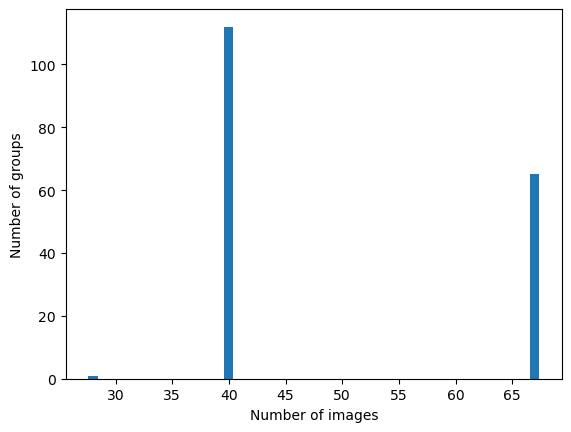

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
    if len(value) not in img_samples_dict:
        img_samples_dict[len(value)] = []
    img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

ax.bar(img_samples_dict.keys(),
       list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [5]:
import numpy as np
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 45.0
Std: 16.30950643030009
Cov: 0.3624334762288909


Посмотрим, можем ли мы лучше разделить train & test вручную

In [7]:
from itertools import groupby
import os

def group_images(image_paths):

    grouped_imgs = dict()

    for path in image_paths:
        key = "\\".join(path.split("\\")[:-1]) + "\\" + path.split("\\")[-1].split(".")[0].split("-")[0]
        if key not in grouped_imgs:
            grouped_imgs[key] = []
        grouped_imgs[key].append(path)

    return grouped_imgs

images_paths = []

for path in image_location_paths:
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            images_paths.append(full_path)

images = group_images(images_paths)
print(len(images))
for key, value in list(images.items())[:10]:
    print(f"Image {key}: samples {len(value)}")

191
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\10: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\100: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\101: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\102: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\103: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\104: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\105: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\106: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\107: samples 40
Image C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\fractured\108: samples 40


Key: 40, value: 121
Key: 67, value: 68
Key: 28, value: 1
Key: 39, value: 1


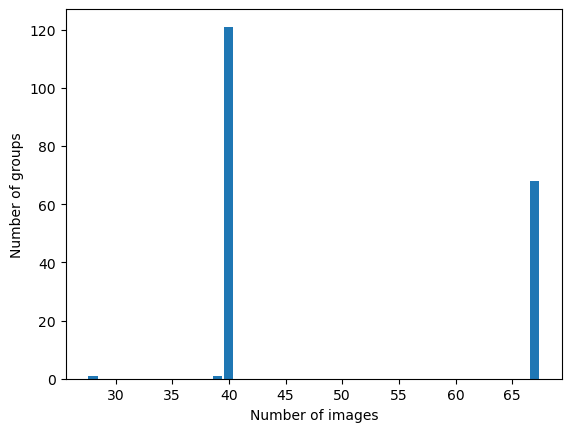

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

img_samples_dict = dict()
for key, value in images.items():
    if len(value) not in img_samples_dict:
        img_samples_dict[len(value)] = []
    img_samples_dict[len(value)].append(key)

fig, ax = plt.subplots()
ax.set_xlabel("Number of images")
ax.set_ylabel("Number of groups")

for key, value in img_samples_dict.items():
    print(f"Key: {key}, value: {len(value)}")

ax.bar(img_samples_dict.keys(),
       list(map(lambda x: len(x), img_samples_dict.values())))
plt.show()

In [9]:
train_mean = np.mean(list(img_samples_dict.keys()))
train_std = np.std(list(img_samples_dict.keys()))
train_v = train_std / train_mean

print(f"Mean: {train_mean}")
print(f"Std: {train_std}")
print(f"Cov: {train_v}")

Mean: 43.5
Std: 14.361406616345072
Cov: 0.3301472785366683


Видим, что результат сильно не улучшился. В датасете присутсвуют аномалии, 28 и 39 изображений для одного пациента. Поскольку 39 близко к матожиданию, оставим эти изображения, а 28 изображений перенесем в валидацию, т.к их скорее всего будут нерепрезентативными для обучения на ранних стадиях. Набор на 67 и 68 изображений обрежем до 40

In [11]:
images_filtered = []
for k, v in images.items():
    if len(v) <= 28:
        continue
    new_v = v[0:40] if len(v) > 40 else v
    new_v = v
    images_filtered.append(new_v)
images_filtered = [item for imgs in images_filtered for item in imgs]

Разобъем выборку на train, val, test

В результате исследования были выявлены потенциальные риски:
1. Некачественные данные: малое или большое количество снимков -> смотрим на распределение и отсеиваем выбросы
2. Риск переобучения -> создаем валидационную выборку
3. Неправильная пометка данных (в train и test номера пациентов совпадают) -> вводим дополнительную метку для изначально предоставленного набора данных
Вывод:
В ходе работы я описал и устранил возможные риски при использовании данных с помощью анализа исходной выборки, подготовил данные и сделал разделение на тренировочную, валидационную и тестовую выборки

## Часть 2. Обучение модели

После 1-го обучения модели я получил точность порядка 50% на тестовых данных, что не очень меня впечатлило. Я решил еще раз взглянуть на изображения и понял, что почти все из них повернуты на ~20 градусов и фильтры нейронки просто не обучаются на "пустых областях". Дополнительно поворот на 90 градусов позволяет обрабатывать случаи симметричности (изображения повернуты в разные стороны в зависимости от того левая конечность или правая), как вариант можно было даже сгенерировать симметричные изображения, но колаб очень долго всё грузит  

In [15]:
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image

val_size = 0.2
test_size = 0.2
random_state = 42

train_images, val_images = train_test_split(images_filtered, test_size=val_size, random_state=random_state)
train_images, test_images = train_test_split(train_images, test_size=test_size, random_state=random_state)

После разделения на train, val, test выборки также сожмем изображения до 224*224 (изображения такого вида будет принимать на вход наша нейросеть)

In [17]:
X_train = train_images
print(X_train[0])
y_train = list(map(lambda path: 0 if "not_fractured" in path else 1, X_train))

X_val = train_images
y_val = list(map(lambda path: 0 if "not_fractured" in path else 1, X_val))

X_test = test_images
y_test = list(map(lambda path: 0 if "not_fractured" in path else 1, X_test))

C:\Users\Илья\Documents\Slava\tnsv\lab2\dataset\training\not_fractured\50-rotated2-rotated3-rotated2.jpg


In [18]:
import torch
torch.cuda.is_available()

True

In [19]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


Напишем свою нейросеть используя pytorch модули и датасеты (можно было взять готовую нейронку по типу AlexNet или LeNet, но я поздно сообразил)

Архитектура нейросети:

1. Image Bath \[40, 224, 224\] -> Conv1: kernel 3x3, stride = 1, padding = 0
2. Conv1 -> FC1 : kernel 2x2, stride = 2, padding = 0 (уменьшаем размерность изображения в 4 раза)
3. FC1 -> Conv2: kernel 3x3, stide = 1, padding = 0 (ищем новые паттерны)
4. Conv2 -> FC2: kernel 3x3, stride = 2, padding = 1 (снова уменьшаем размерность)

Применив сигмойду к FC2 получим бинарную классивикацию изображения на наличие переломов

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import copy

class BoneClassifier(nn.Module):
    def __init__(self):
        super(BoneClassifier, self).__init__()
        #self.norm1 = nn.BatchNorm1d(224)
        self.conv1 = nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(55 * 55, 28)
        self.fc2 = nn.Linear(28, 1)  # Binary classification

    def forward(self, x):
      #x = self.norm1(x)
        x = nn.ReLU()(self.conv1(x))
      #print(x.shape)
        x = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(x)
      #print(x.shape)
        x = nn.ReLU()(self.conv2(x))
      #print(x.shape)
        x = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)(x)
      #print(x.shape)
        x = x.view(-1, self.num_flat_features(x))  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Sigmoid for binary classification
        return x.flatten().type(torch.float64)
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Custom Dataset
class BoneDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = lambda img: torch.FloatTensor(
    np.array(img
             .rotate(20)
             .transpose(Image.FLIP_LEFT_RIGHT)
             .convert('L')
             .resize((224, 224))
            )
    )

# Create datasets
train_dataset = BoneDataset(X_train, y_train, transform=transform)
val_dataset = BoneDataset(X_val, y_val, transform=transform)

BATCH_SIZE = 40

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True, pin_memory=True)


In [22]:
# Initialize the model, loss function, and optimizer
model = BoneClassifier()
import time

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 250
best_acc = -1
best_weights = copy.deepcopy(model.state_dict())
loss_curve = []
val_loss_curve = []
for epoch in range(num_epochs):
    model.train(True)
    acc = 0.0
    batch_loss = 0.0
    start_time = time.time()
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.type(torch.float64))
        loss.backward()
        optimizer.step()
        acc += (outputs.round() == labels).float().mean()
        batch_loss += loss.item()

    batch_loss /= (i + 1)
    loss_curve.append(batch_loss)
    acc = acc / (i + 1)

    with torch.no_grad():
        model.eval()
        val_acc = 0
        val_loss = 0
        for i, (inputs, labels) in enumerate(val_loader, 0):
            outputs = model(inputs)
            val_loss += criterion(outputs, labels.type(torch.float64)) / BATCH_SIZE
            val_acc += (outputs.round() == labels).float().mean()
        avg_acc = val_acc / (i + 1)
        val_loss /= (i + 1)
        val_loss_curve.append(val_loss)
        if avg_acc > best_acc:
            best_acc = avg_acc
            best_weights = copy.deepcopy(model.state_dict())
        print(f'Epoch [{epoch + 1}/{num_epochs}], Avg accuracy: {acc * 100:.4f}, Validation accuracy: {100 * avg_acc:.2f}%')
    end_time = time.time()
    print(f"Finished in {(end_time - start_time):.4f} seconds")
model.load_state_dict(best_weights)

Epoch [1/250], Avg accuracy: 49.1667, Validation accuracy: 50.45%
Finished in 23.8353 seconds
Epoch [2/250], Avg accuracy: 50.0500, Validation accuracy: 50.10%
Finished in 23.6498 seconds
Epoch [3/250], Avg accuracy: 51.0500, Validation accuracy: 49.73%
Finished in 24.3998 seconds
Epoch [4/250], Avg accuracy: 49.6667, Validation accuracy: 50.07%
Finished in 24.0467 seconds
Epoch [5/250], Avg accuracy: 50.4833, Validation accuracy: 51.52%
Finished in 24.0338 seconds
Epoch [6/250], Avg accuracy: 49.5000, Validation accuracy: 50.80%
Finished in 24.0048 seconds
Epoch [7/250], Avg accuracy: 49.8167, Validation accuracy: 51.02%
Finished in 24.3908 seconds
Epoch [8/250], Avg accuracy: 49.2833, Validation accuracy: 51.18%
Finished in 23.8852 seconds
Epoch [9/250], Avg accuracy: 50.0833, Validation accuracy: 50.80%
Finished in 23.7026 seconds
Epoch [10/250], Avg accuracy: 49.5500, Validation accuracy: 50.97%
Finished in 23.7126 seconds
Epoch [11/250], Avg accuracy: 50.7500, Validation accuracy:

KeyboardInterrupt: 

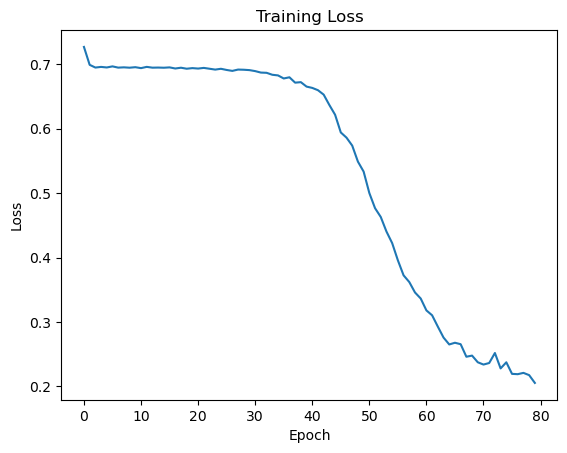

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_curve, label = 'train loss')
#plt.plot(val_loss_curve, label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [27]:
test_dataset = BoneDataset(X_test, y_test, transform = transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Настало время проверить точность нейронки на тестовых данных

In [30]:
with torch.no_grad():
  model.eval()
  acc = 0
  for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model(inputs)
    loss = criterion(outputs, labels.type(torch.float64))
    acc += (outputs.round() == labels).float().mean()
  print(f'Test Accuracy: {acc / (i + 1) * 100}')


Test Accuracy: 82.77027130126953


In [32]:
%pip install torcheval
from torcheval.metrics import BinaryConfusionMatrix

metric = BinaryConfusionMatrix()

with torch.no_grad():
  model.eval()
  acc = 0
  cm = None
  for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model(inputs)
    metric.update(labels.type(torch.int64), outputs.round().type(torch.int64))
print("Confusion matrix: ")
result = metric.compute()

tp, fn = result[0]
fp, tn = result[1]

print("tp:", tp, "fn:", fn)
print("fp:", fp, "tn:", tn)

total = tp + fn + fp + tn

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy: {(tp + tn) / total}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 score: {precision * recall / (precision + recall)}")

Note: you may need to restart the kernel to use updated packages.
Confusion matrix: 
tp: tensor(590.) fn: tensor(131.)
fp: tensor(124.) tn: tensor(635.)
Accuracy: 0.8277027010917664
Precision: 0.8263305425643921
Recall: 0.8183078765869141
f1 score: 0.4111498296260834


# Лабораторная №2
Добавим квантизацию

In [34]:
model_int8 = torch.ao.quantization.quantize_dynamic(
    model,  # the original model
    {torch.nn.Linear},  # a set of layers to dynamically quantize
    dtype=torch.qint8)  # the target dtype for quantized weights

Снова проверим точность

In [39]:
from torcheval.metrics import BinaryConfusionMatrix

metric = BinaryConfusionMatrix()

with torch.no_grad():
  model.eval()
  acc = 0
  cm = None
  for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model_int8(inputs)
    metric.update(labels.type(torch.int64), outputs.round().type(torch.int64))
print("Confusion matrix: ")
result = metric.compute()

tp, fn = result[0]
fp, tn = result[1]

print("tp:", tp, "fn:", fn)
print("fp:", fp, "tn:", tn)

total = tp + fn + fp + tn

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy: {(tp + tn) / total}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 score: {precision * recall / (precision + recall)}")

Confusion matrix: 
tp: tensor(660.) fn: tensor(199.)
fp: tensor(54.) tn: tensor(567.)
Accuracy: 0.829054057598114
Precision: 0.924369752407074
Recall: 0.7683352828025818
f1 score: 0.4195803999900818


Как видно точность сильно не пострадала

# Лабораторная работа №3
Экспортируем модель в представление onnx

In [45]:
#%pip install onnxscript
sample = [data for (data, _) in train_loader][0]
torch.onnx.export(model,               # model being run
                  sample,                         # model input (or a tuple for multiple inputs)
                  "my_model.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                'output' : {0 : 'batch_size'}},
                 dynamo=True)

[torch.onnx] Obtain model graph for `BoneClassifier([...]` with `torch.export.export`...


E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0] Error while creating guard:
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0] Name: ''
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Source: shape_env
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Create Function: SHAPE_ENV
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Guard Types: None
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Code List: None
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Object Weakref: None
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]     Guarded Class Weakref: None
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0] Traceback (most recent call last):
E1216 23:12:05.753000 17348 site-packages\torch\_guards.py:283] [2/0]   File "C:\anaconda\Lib\site-packages\torch\_guards.py", line 281, in create

[torch.onnx] Obtain model graph for `BoneClassifier([...]` with `torch.export.export`... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅


OSError: [Errno 22] Invalid argument: '.\\my_model.onnx.data'

In [47]:
import onnx
onnx_model = onnx.load("my_model.onnx")
onnx.checker.check_model(onnx_model)

Проверим точность модели

In [51]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("my_model.onnx", providers=['CPUExecutionProvider'])

metric = BinaryConfusionMatrix()
start_time = time.time()

for (inputs, labels) in test_loader:
    onnxruntime_outputs = ort_session.run(None, {'input': inputs.numpy()})
    outputs = torch.FloatTensor(np.array(onnxruntime_outputs)).round().type(torch.float64)[0]
    metric.update(labels.type(torch.int64), outputs.round().type(torch.int64))
    end_time = time.time()
print(f"Inference finished in {(end_time - start_time):.4f}")
print("Confusion matrix: ")
result = metric.compute()

tp, fn = result[0]
fp, tn = result[1]

print("tp:", tp, "fn:", fn)
print("fp:", fp, "tn:", tn)

total = tp + fn + fp + tn

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy: {(tp + tn) / total}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 score: {precision * recall / (precision + recall)}")

Inference finished in 2.8494
Confusion matrix: 
tp: tensor(409.) fn: tensor(51.)
fp: tensor(305.) tn: tensor(715.)
Accuracy: 0.7594594359397888
Precision: 0.5728291273117065
Recall: 0.8891304135322571
f1 score: 0.34838157892227173
